In [28]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [29]:
# Load data
file_path = "Resources/shopping_data_cleaned.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0
5,0,22.0,17.0,76.0
6,0,35.0,18.0,6.0
7,0,23.0,18.0,94.0
8,1,64.0,19.0,3.0
9,0,30.0,19.0,72.0


In [30]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_shopping)
    inertia.append(km.inertia_)

C:\Users\yvari\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [31]:
# Create the Elbow Curve using hvplot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [32]:
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [33]:
five_clusters = get_clusters(5, df_shopping)
five_clusters.head()

,Card Member,Age,Annual Income,Spending Score (1-100),class
0,1,19.0,15.0,39.0,0
1,1,21.0,15.0,81.0,4
2,0,20.0,16.0,6.0,0
3,0,23.0,16.0,77.0,4
4,0,31.0,17.0,40.0,0


In [34]:
five_clusters = get_clusters(6, df_shopping)
five_clusters.head()

,Card Member,Age,Annual Income,Spending Score (1-100),class
0,1,19.0,15.0,39.0,5
1,1,21.0,15.0,81.0,4
2,0,20.0,16.0,6.0,5
3,0,23.0,16.0,77.0,4
4,0,31.0,17.0,40.0,5


In [35]:
# Plotting the 2D-Scatter with x="Annual Income" and y="Spending Score (1-100)"
five_clusters.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)", by="class")

:NdOverlay   [class]
   :Scatter   [Annual Income]   (Spending Score (1-100))

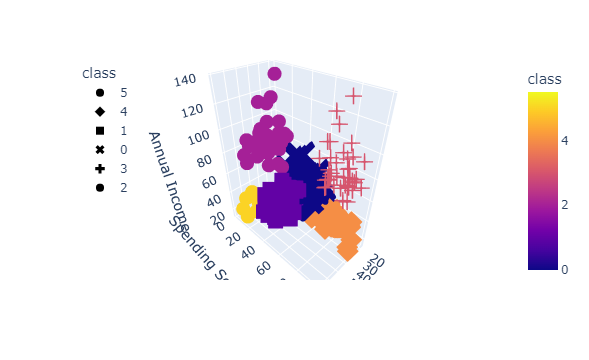

In [36]:
# Plot the 3D-scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    five_clusters,
    x="Age",
    y="Spending Score (1-100)",
    z="Annual Income",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

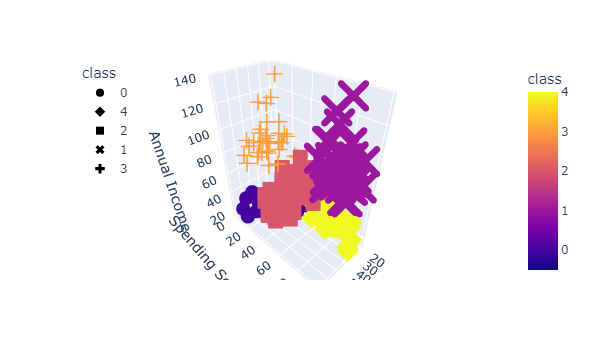

In [43]:
# Plot the 3D-scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    six_clusters,
    x="Age",
    y="Spending Score (1-100)",
    z="Annual Income",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [44]:
six_clusters = get_clusters(5, df_shopping)
six_clusters.head()

,Card Member,Age,Annual Income,Spending Score (1-100),class
0,1,19.0,15.0,39.0,0
1,1,21.0,15.0,81.0,4
2,0,20.0,16.0,6.0,0
3,0,23.0,16.0,77.0,4
4,0,31.0,17.0,40.0,0


In [42]:
# Plotting the 2D-Scatter with x="Annual Income" and y="Spending Score (1-100)"
six_clusters.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)", by="class")

:NdOverlay   [class]
   :Scatter   [Annual Income]   (Spending Score (1-100))